In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:/Data Analysis/IMDb_Dataset.csv")

In [3]:
data.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,Gladiator,8.5,2000,R,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson,67.0,155.0
1,Mission: Impossible - Dead Reckoning Part One,7.7,2023,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,81.0,163.0
2,Rebel Moon - Part Two: The Scargiver,5.2,2024,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,35.0,122.0
3,Inglourious Basterds,8.4,2009,R,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth,69.0,153.0
4,Borderlands,7.1,2024,R,Action,Eli Roth,Eli RothJoe Crombie,66.9,116.3


In [4]:
data.tail()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
395,Mother of the Bride,4.8,2024,TV-PG,Comedy,Mark Waters,Brooke ShieldsMiranda CosgroveBenjamin Bratt,39.0,88.0
396,Beetlejuice Beetlejuice,7.1,2024,R,Comedy,Tim Burton,Alfred GoughMiles MillarSeth Grahame-Smith,66.9,116.3
397,The Idea of You,6.4,2024,R,Comedy,Michael Showalter,Anne HathawayNicholas GalitzineElla Rubin,67.0,115.0
398,IF,6.7,2024,PG,Animation,John Krasinski,Cailey FlemingRyan ReynoldsJohn Krasinski,46.0,104.0
399,The Fall Guy,7.1,2024,PG-13,Action,David Leitch,Ryan GoslingEmily BluntAaron Taylor-Johnson,73.0,126.0


In [5]:
data.shape

(400, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               400 non-null    object 
 1   IMDb Rating         400 non-null    float64
 2   Year                400 non-null    int64  
 3   Certificates        400 non-null    object 
 4   Genre               400 non-null    object 
 5   Director            400 non-null    object 
 6   Star Cast           400 non-null    object 
 7   MetaScore           400 non-null    float64
 8   Duration (minutes)  400 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 28.3+ KB


In [7]:
data.describe()

,IMDb Rating,Year,MetaScore,Duration (minutes)
count,400.000000,400.000000,400.000000,400.000000
mean,7.110250,2015.150000,66.898750,116.334750
std,0.932251,13.470194,15.312006,21.369757
min,3.900000,1939.000000,26.000000,80.000000
25%,6.700000,2010.750000,57.750000,101.000000
50%,7.100000,2023.000000,66.900000,116.000000
75%,7.700000,2024.000000,77.000000,124.000000
max,9.200000,2025.000000,100.000000,206.000000


In [8]:
data.isnull().sum()

Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Duration (minutes)    0
dtype: int64

In [9]:
#Titles which has above 9.0 rating
data[data['IMDb Rating'] >= 9.0 ]['Title']

106       12 Angry Men
130    The Dark Knight
137      The Godfather
Name: Title, dtype: object

In [10]:
#Top 10 Rated title with Director name
data.nlargest(10,'IMDb Rating')[['Title','IMDb Rating','Director']]

,Title,IMDb Rating,Director
137,The Godfather,9.2,Francis Ford Coppola
106,12 Angry Men,9.0,Sidney Lumet
130,The Dark Knight,9.0,Christopher Nolan
15,The Lord of the Rings: The Fellowship of the Ring,8.9,Peter Jackson
132,Pulp Fiction,8.9,Quentin Tarantino
14,Inception,8.8,Christopher Nolan
221,Inception,8.8,Christopher Nolan
24,Interstellar,8.7,Christopher Nolan
125,Goodfellas,8.7,Martin Scorsese
211,The Matrix,8.7,Lana Wachowski


In [11]:
#Movie titles of a particular Director
data[data['Director'] == 'Christopher Nolan'][['Title','IMDb Rating']]

,Title,IMDb Rating
14,Inception,8.8
24,Interstellar,8.7
130,The Dark Knight,9.0
221,Inception,8.8
225,Interstellar,8.7


In [12]:
#count of the Adventure Movies
len(data[data["Genre"] == "Adventure"])

35

In [13]:
#List of the Titles which released in yr 2022 to 2024
data[(data['Year']>= 2022) & (data['Year']<=2024)]

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
1,Mission: Impossible - Dead Reckoning Part One,7.7,2023,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,81.0,163.0
2,Rebel Moon - Part Two: The Scargiver,5.2,2024,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,35.0,122.0
4,Borderlands,7.1,2024,R,Action,Eli Roth,Eli RothJoe Crombie,66.9,116.3
8,Descendants: The Rise of Red,7.1,2024,TV-G,Action,Jennifer Phang,Rita OraJoshua ColleyChina Anne McClain,66.9,116.3
9,Wish,5.6,2023,PG,Animation,Chris Buck,Jennifer LeeAllison MooreChris Buck,47.0,95.0
...,...,...,...,...,...,...,...,...,...
395,Mother of the Bride,4.8,2024,TV-PG,Comedy,Mark Waters,Brooke ShieldsMiranda CosgroveBenjamin Bratt,39.0,88.0
396,Beetlejuice Beetlejuice,7.1,2024,R,Comedy,Tim Burton,Alfred GoughMiles MillarSeth Grahame-Smith,66.9,116.3
397,The Idea of You,6.4,2024,R,Comedy,Michael Showalter,Anne HathawayNicholas GalitzineElla Rubin,67.0,115.0
398,IF,6.7,2024,PG,Animation,John Krasinski,Cailey FlemingRyan ReynoldsJohn Krasinski,46.0,104.0


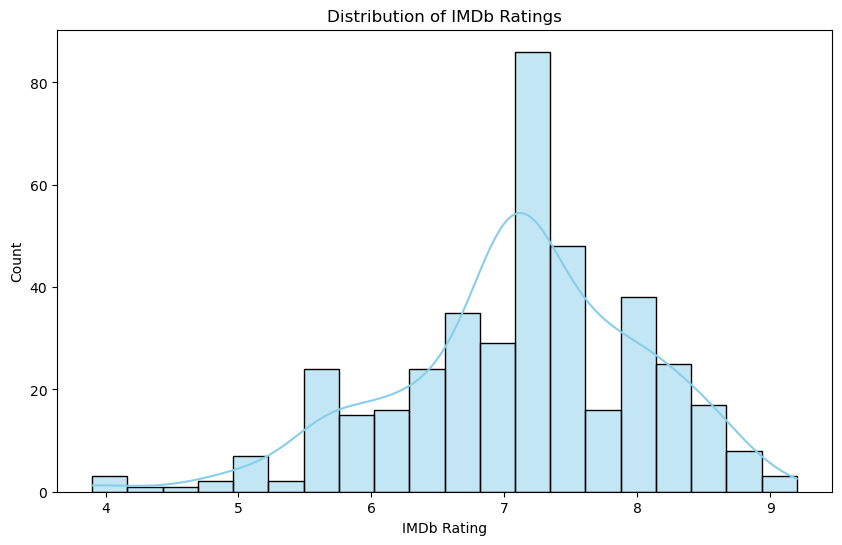

In [14]:
#Distribution of IMDb Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['IMDb Rating'], kde=True, color='Skyblue')
plt.title('Distribution of IMDb Ratings')
plt.show()

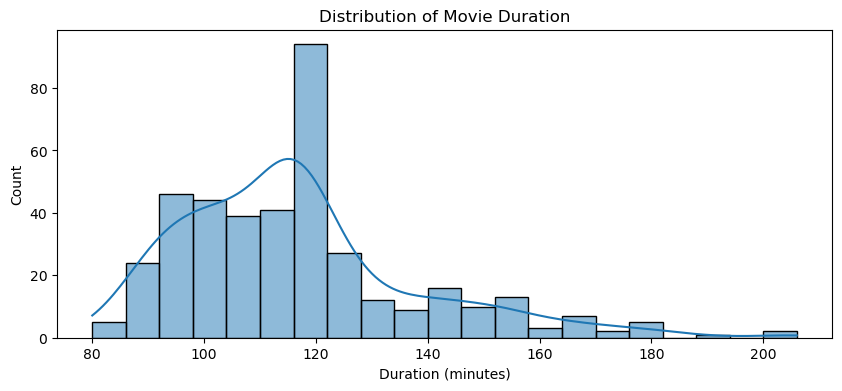

In [15]:
#Distribution of Movie Duration
plt.figure(figsize=(10, 4))
sns.histplot(data['Duration (minutes)'], kde=True)
plt.title('Distribution of Movie Duration')
plt.show()

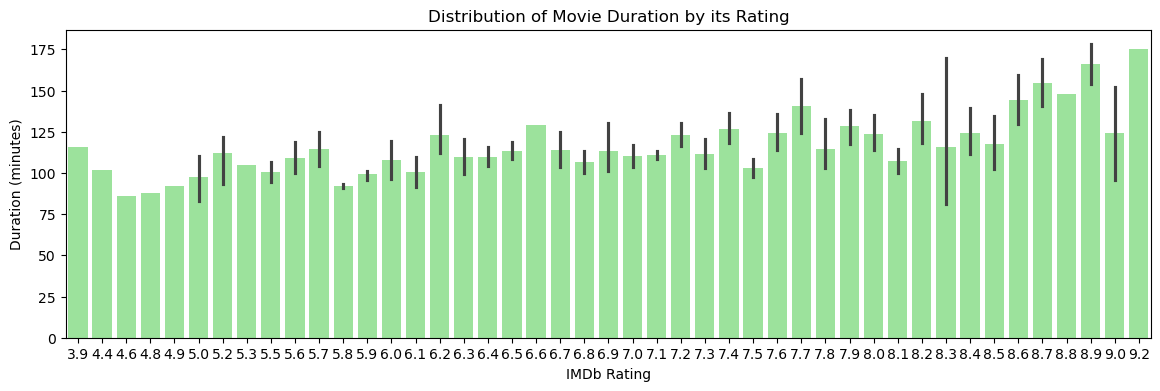

In [16]:
#Distribution of Movie Duration by its Rating
plt.figure(figsize=(14, 4))
sns.barplot(data=data, y= 'Duration (minutes)',x='IMDb Rating', color='Lightgreen' )
plt.title('Distribution of Movie Duration by its Rating')
plt.show()

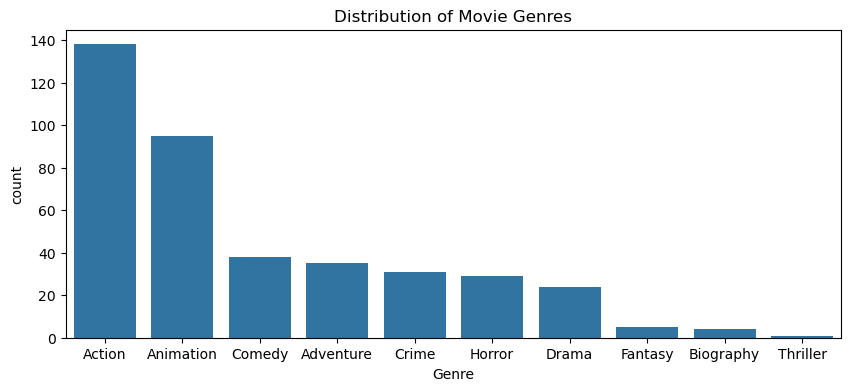

In [17]:
# Plot the distribution of genres
plt.figure(figsize=(10, 4))
sns.countplot(x='Genre', data=data, order=data['Genre'].value_counts().index)
plt.title('Distribution of Movie Genres')
plt.show()

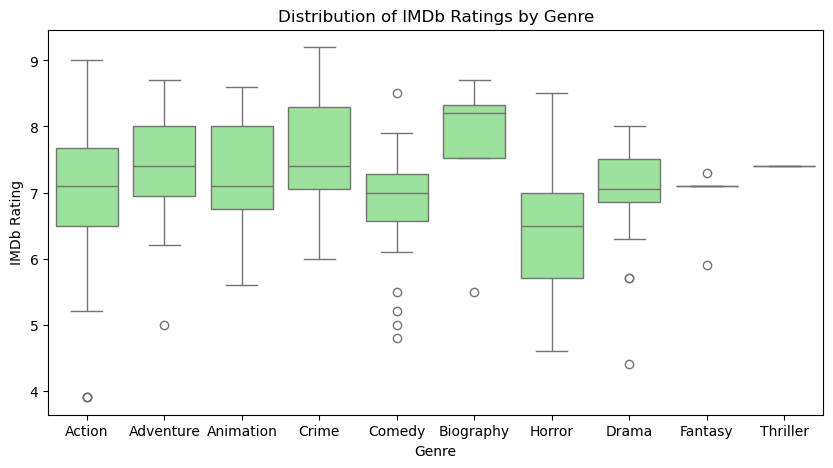

In [18]:
#Distribution of IMDb Ratings by Genre
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Genre', y='IMDb Rating',color = 'lightgreen')
plt.title('Distribution of IMDb Ratings by Genre')
plt.show()

Text(0.5, 1.0, 'Distribution of IMDb Ratings Across MetaScore')

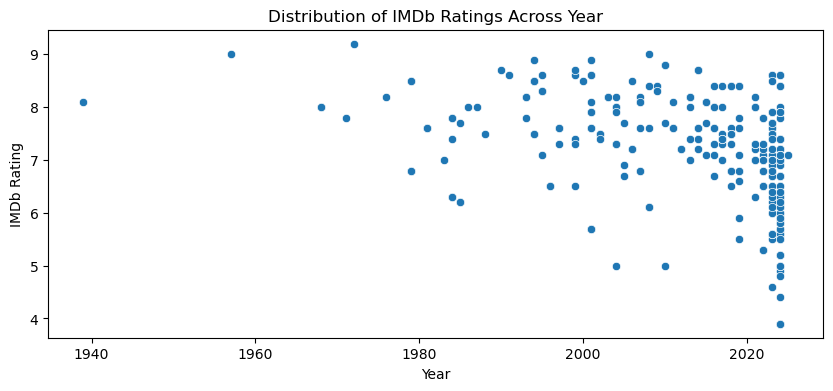

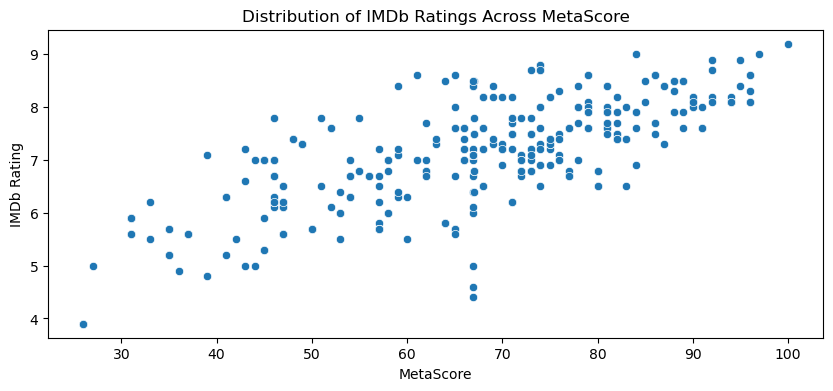

In [19]:
#Distribution of IMDb Ratings Across Year and Metascore
fig, a = plt.subplots(1,1, figsize = (10, 4))
sns.scatterplot(data=data, x='Year', y='IMDb Rating')
plt.title('Distribution of IMDb Ratings Across Year')
fig, a = plt.subplots(1,1, figsize = (10, 4))
sns.scatterplot(data=data, x='MetaScore', y='IMDb Rating')
plt.title('Distribution of IMDb Ratings Across MetaScore')